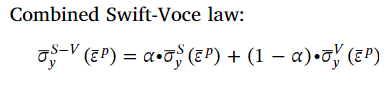

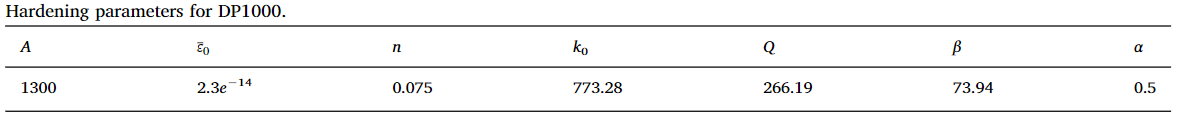

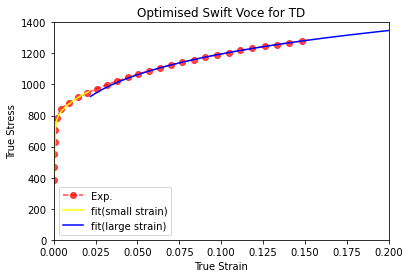

# $\frac{\sigma}{\sigma_{ref}}$ v.s. Temp @ strain 0, ..., curves
## $f(T)_{0}$@ strain 0, $f(T)_{1}$@ strain 0.001, $f(T)_{2}$@ strain 0.002, ..., $f(T)_{n}$@ strain 3
## combining $C_{10}^{T}$, $C_{11}^{T}$, ..., $C_{1n}^{T}$ into 

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from scipy.optimize import curve_fit

### calculate $\frac{\sigma}{\sigma_{ref}}$

In [11]:
with open('Fitted_FC_TK_RD.csv', 'r') as in_csv:
    csv_reader = csv.reader(in_csv, delimiter=';')
    with open('Fitted_FC_TK_RDref.csv', 'w', newline='') as out_csv:        
        csv_writer = csv.writer(out_csv)
        csv_writer.writerow(['Strain', '298.15', '373.15', '473.15', '573.15', '673.15', '77.15', '233.15', 'sref373.15', 'sref473.15', 'sref573.15', 'sref673.15', 'sref77.15', 'sref233.15'])
        for i, row in enumerate(csv_reader):
            if i != 0:
                if float(row[1]) != 0:
                    row.append(float(row[2]) / float(row[1]))
                    row.append(float(row[3]) / float(row[1]))
                    row.append(float(row[4]) / float(row[1]))
                    row.append(float(row[5]) / float(row[1]))
                    row.append(float(row[6]) / float(row[1]))
                    row.append(float(row[7]) / float(row[1]))
                else:
                     row.append(str(0))                    
                csv_writer.writerow(row)

### read input

In [12]:
filename = "Fitted_FC_TK_RDref.csv"
df = pd.read_csv(filename, header=0, sep=',', dtype=float)
titles=list(df.columns)
df.head()

,Strain,298.15,373.15,473.15,573.15,673.15,77.15,233.15,sref373.15,sref473.15,sref573.15,sref673.15,sref77.15,sref233.15
0,0.000,377.306,562.791991,562.981545,639.865574,422.102637,1068.442457,571.547346,1.491606,1.492109,1.695880,1.118728,2.831766,1.514811
1,0.001,727.558,727.545071,755.355403,752.990771,678.171426,1150.593967,700.082967,0.999982,1.038206,1.034956,0.932120,1.581446,0.962237
2,0.002,784.839,776.237001,804.081884,798.196197,740.697168,1193.762402,779.448311,0.989040,1.024518,1.017019,0.943757,1.521028,0.993131
3,0.003,820.567,804.661190,834.372321,827.692672,765.616799,1224.455474,830.614345,0.980616,1.016824,1.008684,0.933034,1.492207,1.012244
4,0.004,844.964,823.651318,856.707169,849.928452,781.620530,1248.216974,865.066098,0.974777,1.013898,1.005875,0.925034,1.477243,1.023790


### y values

### $C_{1}^{T}$ - $C_{5}^{T}$

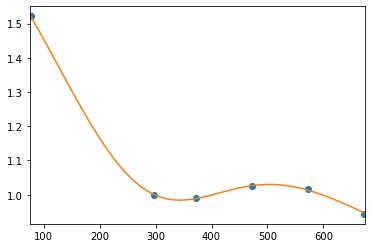

In [166]:
T = np.array([77.15, 298.15, 373.15, 473.15, 573.15, 673.15])
y = np.array([df.iloc[2][-1], 1, df.iloc[2][-5], df.iloc[2][-4], df.iloc[2][-3], df.iloc[2][-2]])

def f_func(T, cT1, cT2, cT3, cT4, cT5):
    return cT1*(np.exp(-cT2*T))-cT3*(np.exp(-((T-cT4)/cT5)**2))

params = curve_fit(f_func, T, y, bounds=([0, 0.0001, 0, 270, 100], [2., 0.001, 1., 673.15, 200]))

[cT1, cT2, cT3, cT4, cT5] = params[0]

T_fit = np.linspace(np.min(T), np.max(T), 50)
y_fit = f_func(T_fit, cT1, cT2, cT3, cT4, cT5)

plt.plot(T,y,'o', T_fit, y_fit)
plt.xlim([np.min(T_fit)-1, np.max(T_fit) + 1 ])
#plt.ylim([np.min(y_fit), np.max(y_fit) + 1 ])
plt.show()

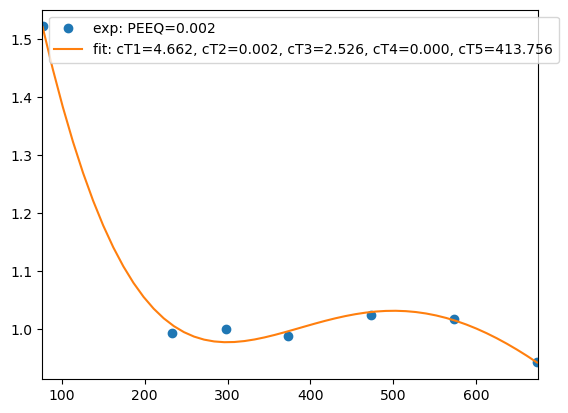

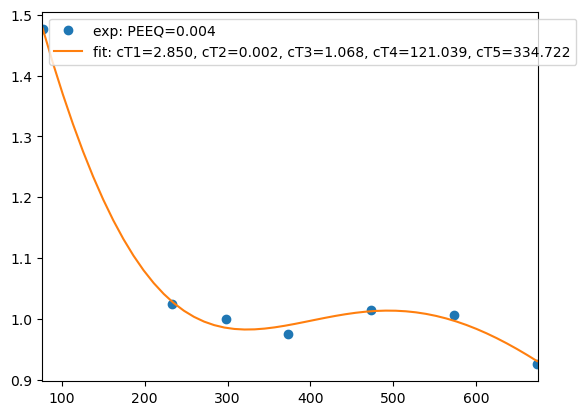

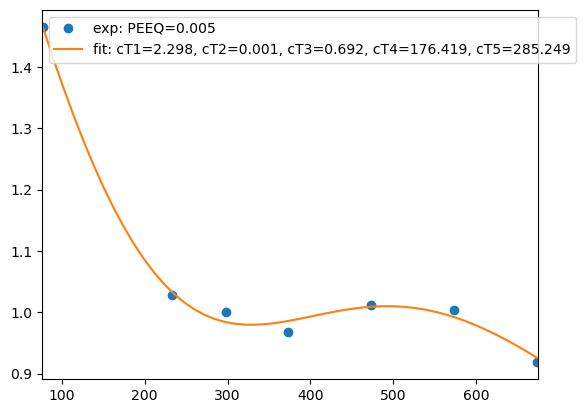

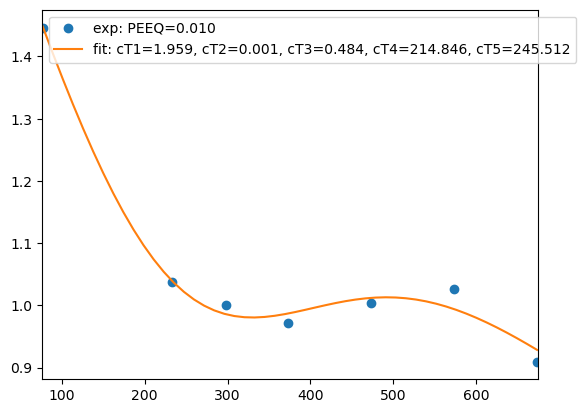

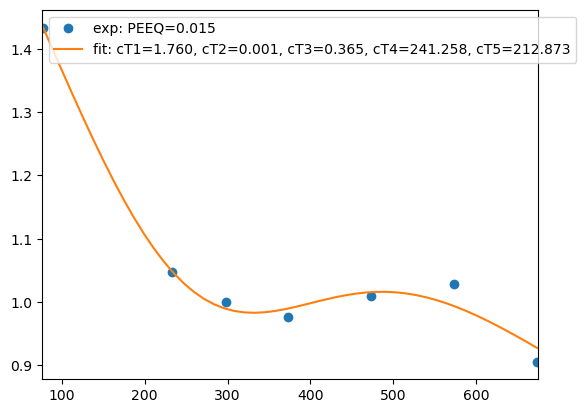

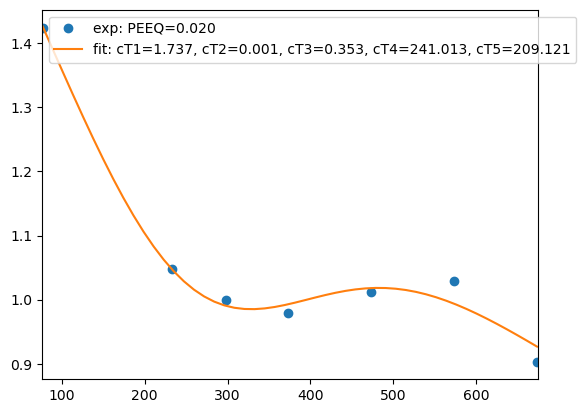

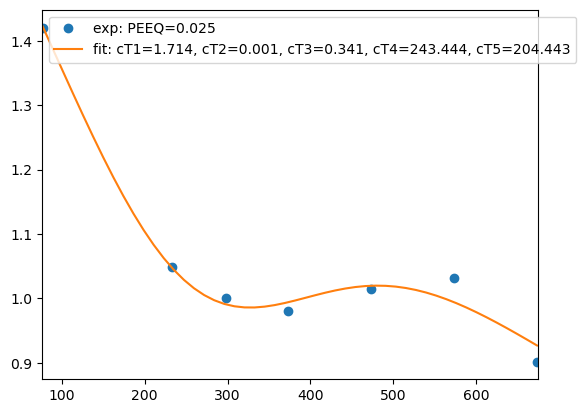

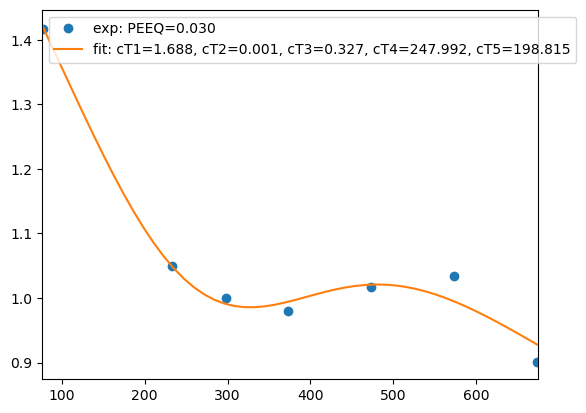

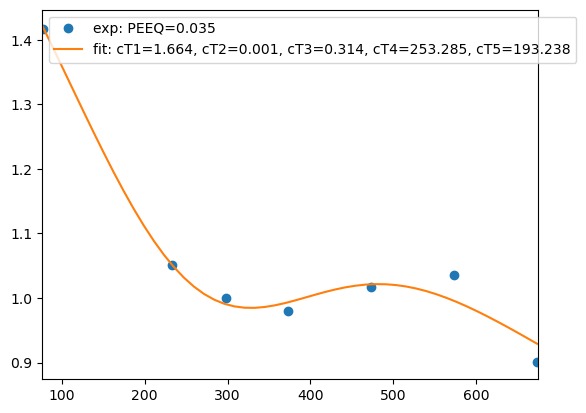

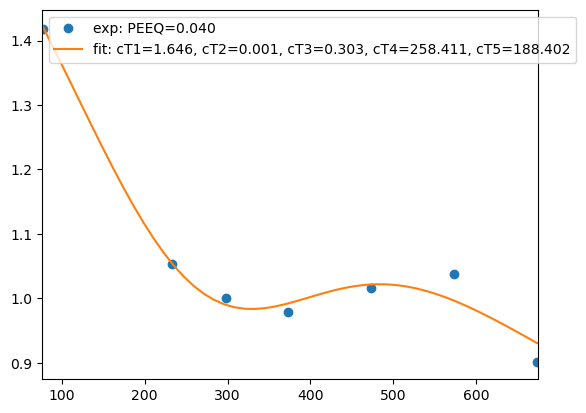

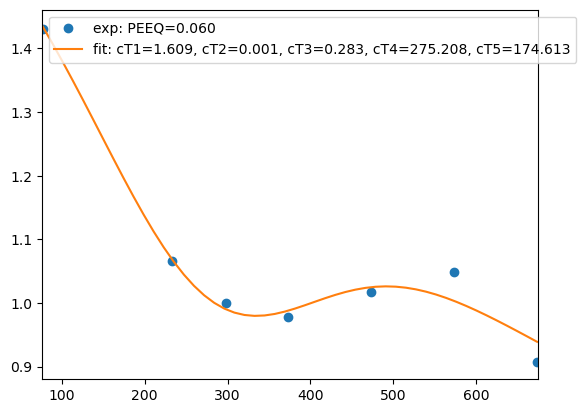

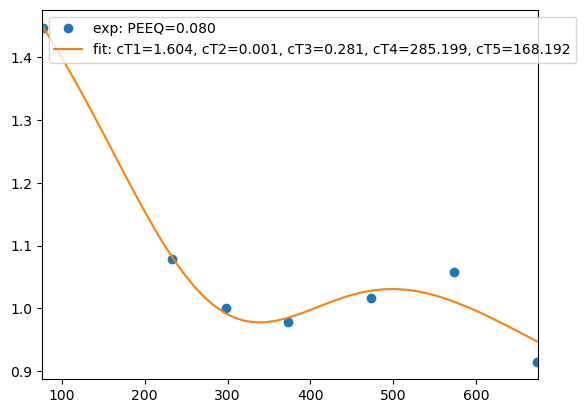

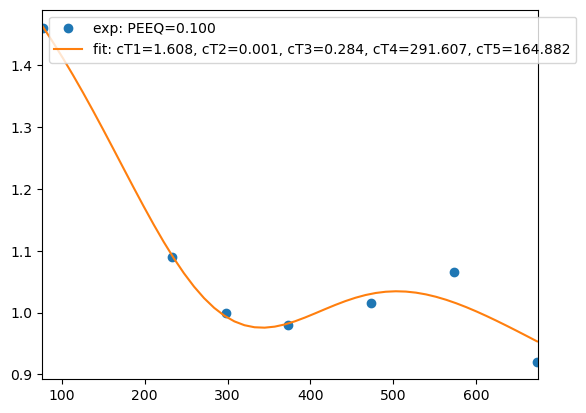

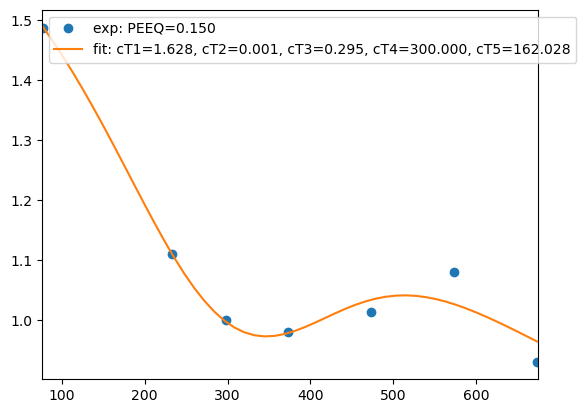

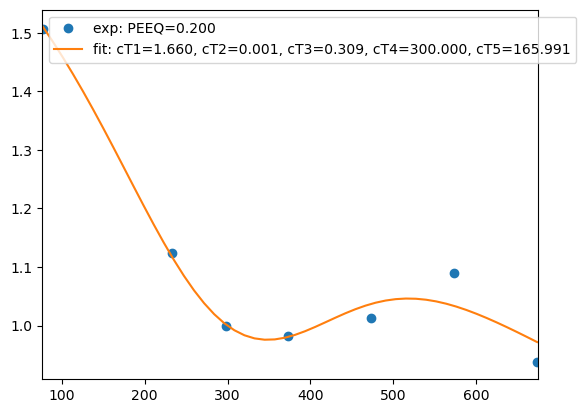

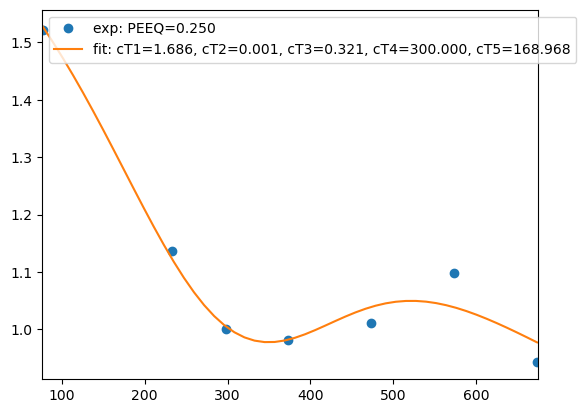

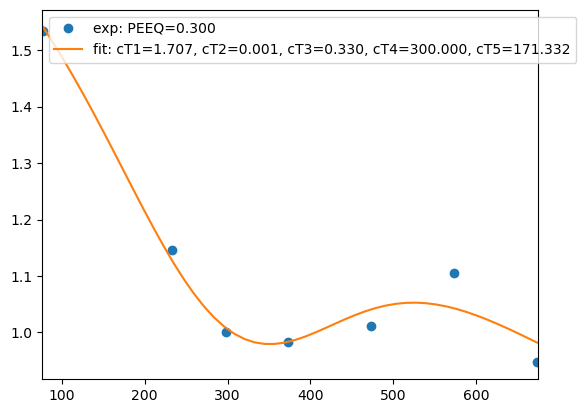

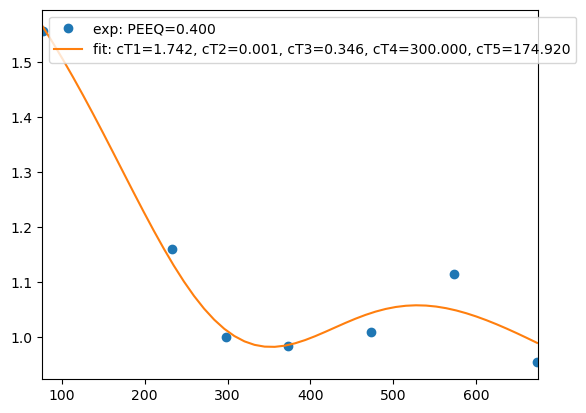

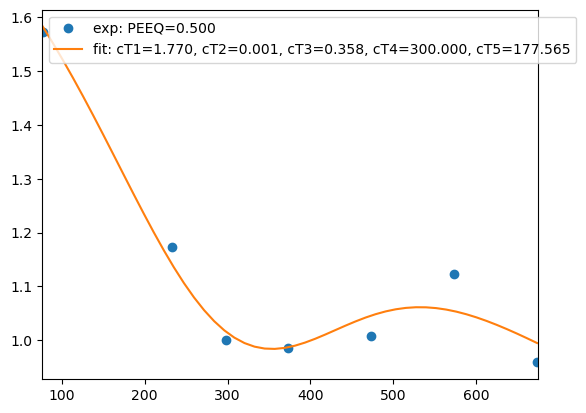

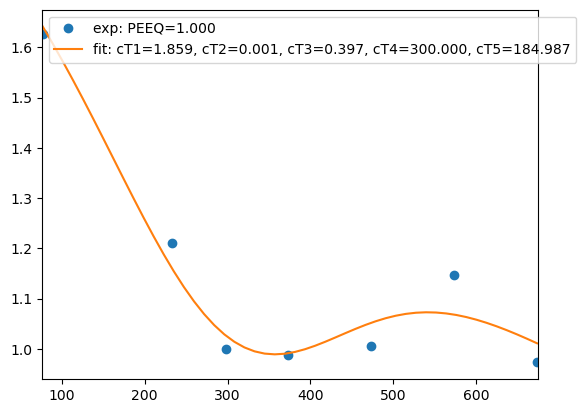

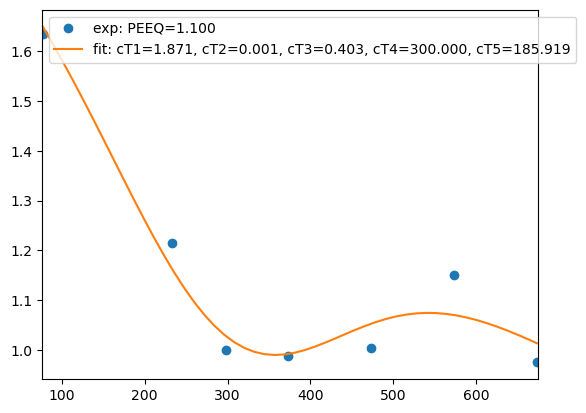

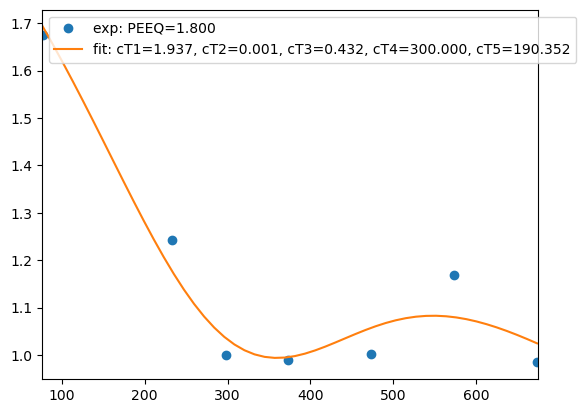

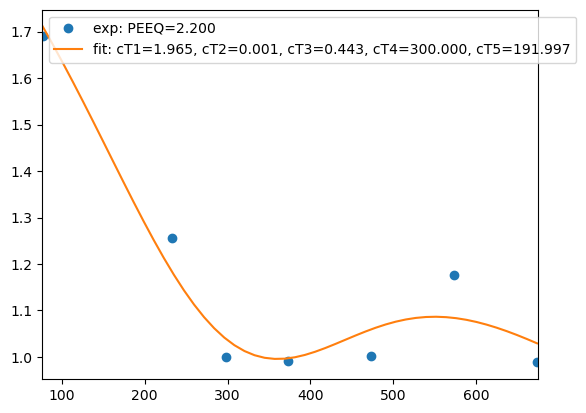

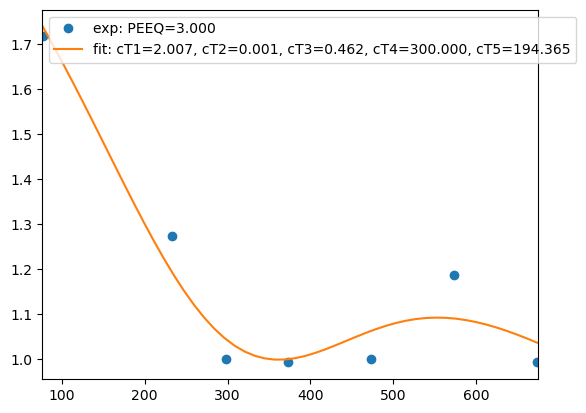

In [10]:
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])
y = {}
p = {}

def f_func(T, cT1, cT2, cT3, cT4, cT5):
    return cT1*(np.exp(-cT2*T))-cT3*(np.exp(-((T-cT4)/cT5)**2))

#for i, row in enumerate((df.iloc[::2,[0]]).values.tolist()):
for j, i in enumerate(np.array([2, 4, 5, 6, 11, 16, 21, 26, 31, 36, 56, 76, 96, 101, 106, 111, 116, 126, 136, 186, 196, 266, 306, 386])):
    if i != 0:
        y["sref{}".format(i)] = np.array([df.iloc[i][-2], df.iloc[i][-1], 1, df.iloc[i][-6], df.iloc[i][-5], df.iloc[i][-4], df.iloc[i][-3]])
        params = curve_fit(f_func, T, y["sref{}".format(i)], bounds=([0, 0.0001, 0, 0, 100], [5., 0.003, 3.0, 300, 500]))
        #params = curve_fit(f_func, T, y["sref{}".format(i)], bounds=([0, 0.0001, 0, 270, 100], [2., 0.001, 0.5, 673.15, 200]), max_nfev=100000000)
        [cT1, cT2, cT3, cT4, cT5] = params[0]
        p["fit{}".format(i)] = [cT1, cT2, cT3, cT4, cT5]
        T_fit = np.linspace(np.min(T), np.max(T), 50)
        y_fit = f_func(T_fit, cT1, cT2, cT3, cT4, cT5)
        plotObjects = plt.plot(T,y["sref{}".format(i)],'o', T_fit, y_fit)
        plt.xlim([np.min(T_fit)-1, np.max(T_fit) + 1 ])   
        plt.legend(iter(plotObjects), ('exp: PEEQ=%5.3f'% df.iloc[i][0],  'fit: cT1=%5.3f, cT2=%5.3f, cT3=%5.3f, cT4=%5.3f, cT5=%5.3f' % tuple(p["fit{}".format(i)])))
        plt.show()
    else:
        str(0)

### $C_{1}^{T}$ - $C_{5}^{T}$ calculation

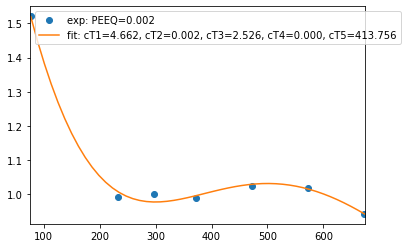

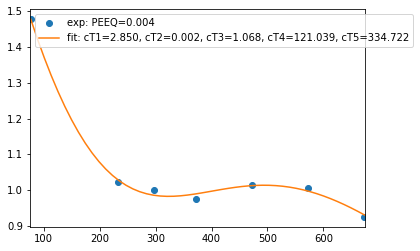

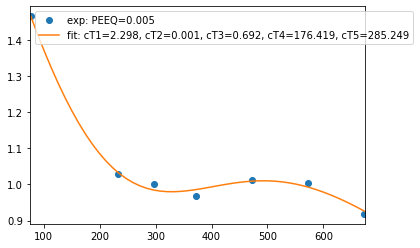

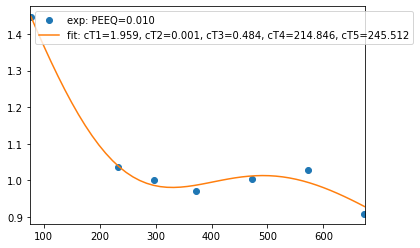

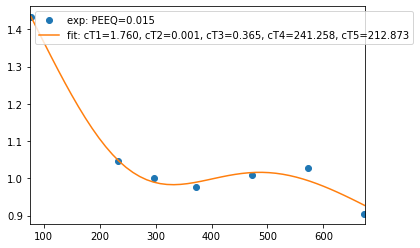

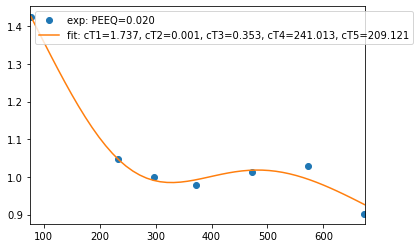

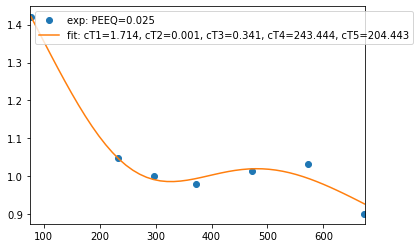

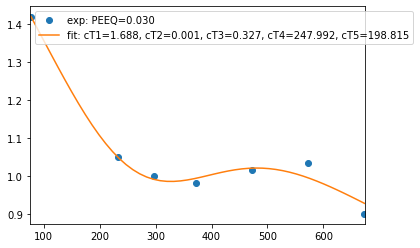

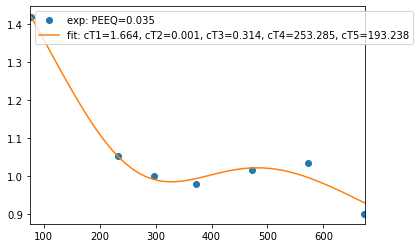

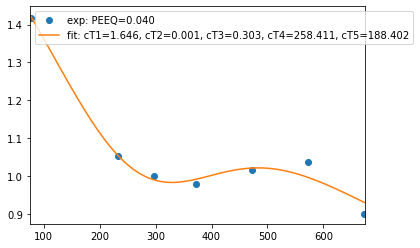

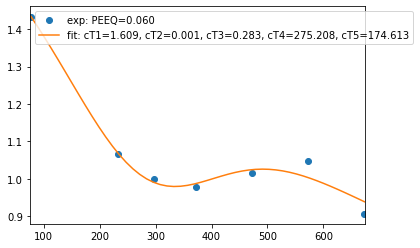

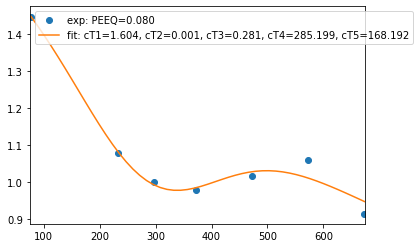

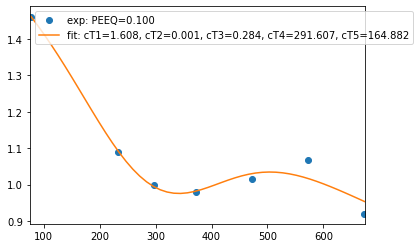

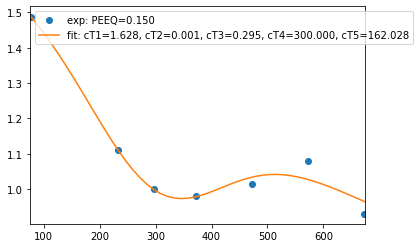

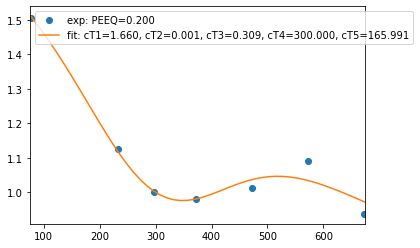

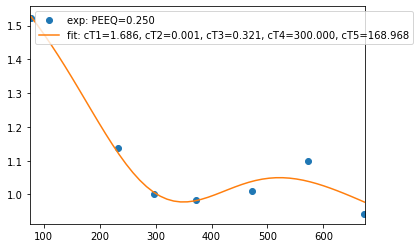

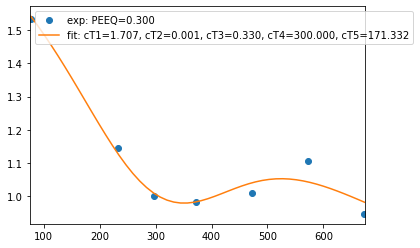

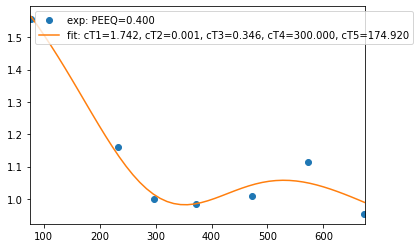

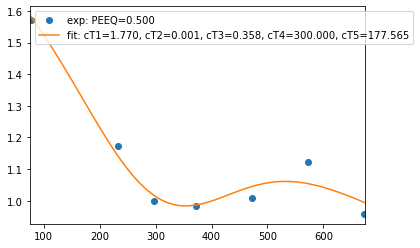

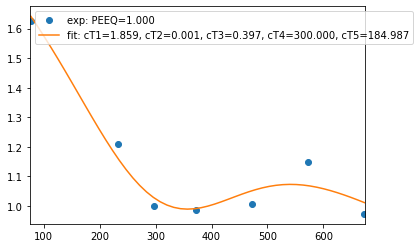

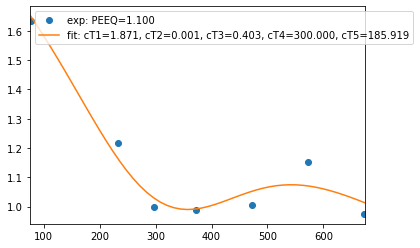

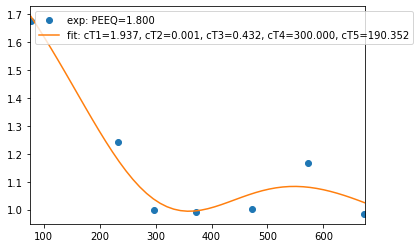

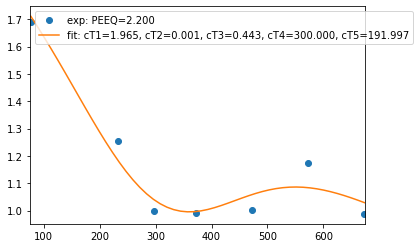

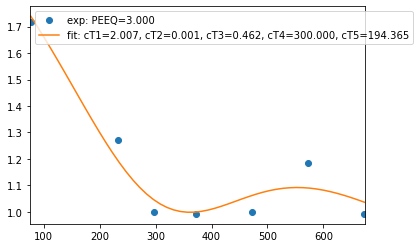

In [11]:
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])
y = {}
p = {}
#PEEQ = {}
PEEQ = []
def f_func(T, cT1, cT2, cT3, cT4, cT5):
    return cT1*(np.exp(-cT2*T))-cT3*(np.exp(-((T-cT4)/cT5)**2))

for j, i in enumerate(np.array([2, 4, 5, 6, 11, 16, 21, 26, 31, 36, 56, 76, 96, 101, 106, 111, 116, 126, 136, 186, 196, 266, 306, 386])):
    if i != 0:
        y["sref{}".format(i)] = np.array([df.iloc[i][-2], df.iloc[i][-1], 1, df.iloc[i][-6], df.iloc[i][-5], df.iloc[i][-4], df.iloc[i][-3]])
        y.update(y)
        params = curve_fit(f_func, T, y["sref{}".format(i)], bounds=([0, 0.0001, 0, 0, 100], [5., 0.003, 3.0, 300, 500]))
        #params = curve_fit(f_func, T, y["sref{}".format(i)], bounds=([1.5, 0.0006, 0.2, 270, 130], [2., 0.0009, 0.6, 308, 225]))
        #params = curve_fit(f_func, T, y["sref{}".format(i)], bounds=([1.5, 0.0006, 0.2, 270, 130], [2., 0.0009, 0.6, 308, 225]), max_nfev=100000000)
        [cT1, cT2, cT3, cT4, cT5] = params[0]
        p["fit{}".format(i)] = [cT1, cT2, cT3, cT4, cT5]
        p.update(p)
        #PEEQ["strpt{}".format(j)] = df.iloc[i][0]
        #PEEQ.update(PEEQ)
        PEEQ = np.append(PEEQ, df.iloc[i][0])
        T_fit = np.linspace(np.min(T), np.max(T), 50)
        y_fit = f_func(T_fit, cT1, cT2, cT3, cT4, cT5)
        plotObjects = plt.plot(T,y["sref{}".format(i)],'o', T_fit, y_fit)
        plt.xlim([np.min(T_fit)-1, np.max(T_fit) + 1 ])   
        plt.legend(iter(plotObjects), ('exp: PEEQ=%5.3f'% df.iloc[i][0],  'fit: cT1=%5.3f, cT2=%5.3f, cT3=%5.3f, cT4=%5.3f, cT5=%5.3f' % tuple(p["fit{}".format(i)])))
        plt.show()
    else:
        str(0)

### $C_{1}^{T}$ - $C_{5}^{T}$ parameters fitting

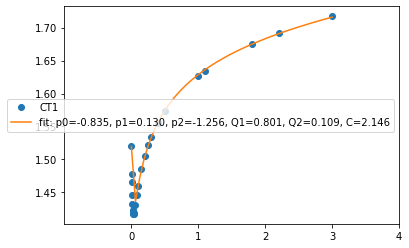

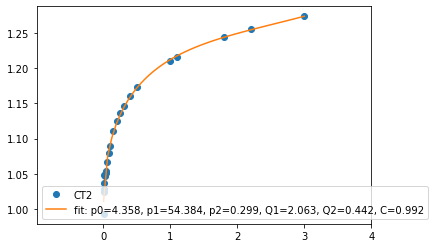

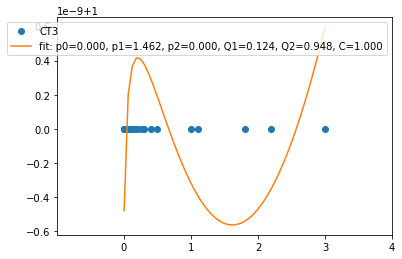

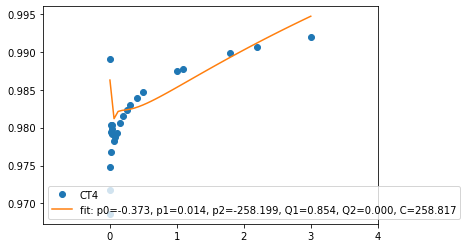

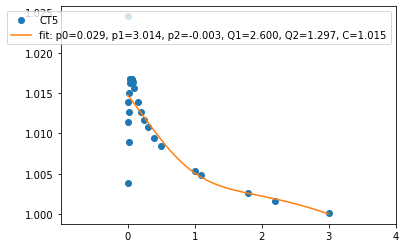

In [ ]:
def cT1to4_func(s, p0, p1, p2, Q1, Q2, C):
    return -p0*s/(s**Q1+p1) + C + p2*(s**Q2)
def cT5_func(s, p0, p1, p2, Q1, Q2):
    return p0*(s+p1)**Q1 + p2*(1- np.exp(-Q2*s)) 
para = {}
cT = {}

for j, i in enumerate(np.array([1, 2, 3, 4, 5])):
    if i != 0:
        para_array = []
        for m, n in enumerate(np.array([2, 4, 5, 6, 11, 16, 21, 26, 31, 36, 56, 76, 96, 101, 106, 111, 116, 126, 136, 186, 196, 266, 306, 386])):
            para_array = np.append(para_array, y["sref{}".format(n)][j])
            para["CT{}".format(i)] = para_array
            para.update(para)
        para.update(para)
        params = curve_fit(cT1to4_func, PEEQ, para["CT{}".format(i)],maxfev = 10000)
        #bounds=([0, 0.0001, 0, 0, 0], [0.5, 0.001, 0.5, 1.5, 2.]), max_nfev=100000000)
        [p0, p1, p2, Q1, Q2, C] = params[0]
        cT["para{}".format(i)] = [p0, p1, p2, Q1, Q2, C]
        cT.update(cT)
        PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 50)
        para_fit = cT1to4_func(PEEQ_fit, p0, p1, p2, Q1, Q2, C)
        plotObjects = plt.plot(PEEQ,para["CT{}".format(i)],'o', PEEQ_fit, para_fit)
        plt.xlim([np.min(PEEQ_fit)-1, np.max(PEEQ_fit) + 1 ])   
        plt.legend(iter(plotObjects), ('CT%d'% i,  'fit: p0=%5.3f, p1=%5.3f, p2=%5.3f, Q1=%5.3f, Q2=%5.3f, C=%5.3f' % tuple(cT["para{}".format(i)])))
        plt.show()
    else:
        str(0)

In [216]:
para_array

array([1.52102839, 1.47724279, 1.46568206, 1.44650423, 1.42361033,
       1.417376  , 1.41738915, 1.41845998, 1.43897387, 1.45335043,
       1.45981684, 1.57281594, 1.62680402, 1.63442163, 1.69112952,
       1.71721606, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [214]:
cT

{'para1': [0.5909242029768239,
  0.23455071307252262,
  0.6648500052910763,
  -1.1773895811205064,
  1.576307004310119,
  1.4460578639347665]}

In [183]:
from scipy.optimize import least_squares
T = np.array([77.15, 298.15, 373.15, 473.15, 573.15, 673.15])
y = {}
p = {}

def f_func(T, cT1, cT2, cT3, cT4, cT5):
    return cT1*(np.exp(-cT2*T))-cT3*(np.exp(-((T-cT4)/cT5)**2))

#for i, row in enumerate((df.iloc[::2,[0]]).values.tolist()):
for j, i in enumerate(np.array([2, 4, 5, 6, 16, 26, 31, 36, 66, 86, 96, 136, 186, 196, 306, 386])):
    if i != 0:
        y["sref{}".format(i)] = np.array([df.iloc[i][-1], 1, df.iloc[i][-5], df.iloc[i][-4], df.iloc[i][-3], df.iloc[i][-2]])
        params = least_squares(f_func, T, y["sref{}".format(i)], max_nfev=100000000)
        #params = curve_fit(f_func, T, y["sref{}".format(i)], bounds=(0, [2., 0.001, 1.9, 673.15, 800]), max_nfev=100000000)
        [cT1, cT2, cT3, cT4, cT5] = params[0]
        p["fit{}".format(i)] = [cT1, cT2, cT3, cT4, cT5]
        T_fit = np.linspace(np.min(T), np.max(T), 50)
        y_fit = f_func(T_fit, cT1, cT2, cT3, cT4, cT5)
        plotObjects = plt.plot(T,y["sref{}".format(i)],'o', T_fit, y_fit)
        plt.xlim([np.min(T_fit)-1, np.max(T_fit) + 1 ])   
        plt.legend(iter(plotObjects), ('exp: PEEQ=%5.3f'% df.iloc[i][0],  'fit: cT1=%5.3f, cT2=%5.3f, cT3=%5.3f, cT4=%5.3f, cT5=%5.3f' % tuple(p["fit{}".format(i)])))
        plt.show()
    else:
        str(0)

#plt.ylim([np.min(y_fit), np.max(y_fit) + 1 ])

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_lsq\least_squares.py:764: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if jac not in ['2-point', '3-point', 'cs'] and not callable(jac):


ValueError: `jac` must be '2-point', '3-point', 'cs' or callable.

### $C_{1}^{T}$ - $C_{6}^{T}$

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


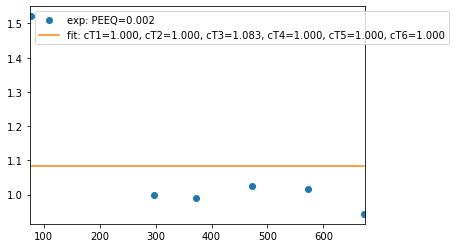

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


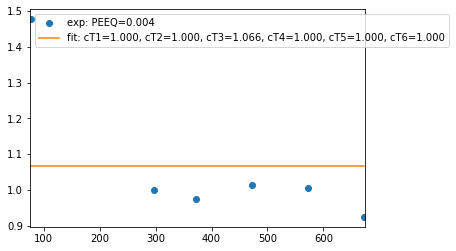

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


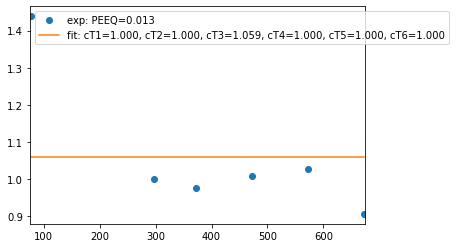

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


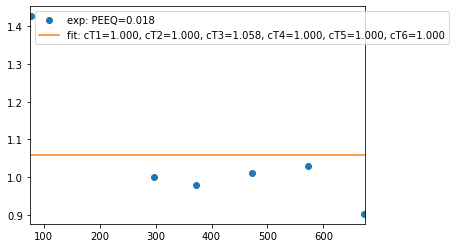

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


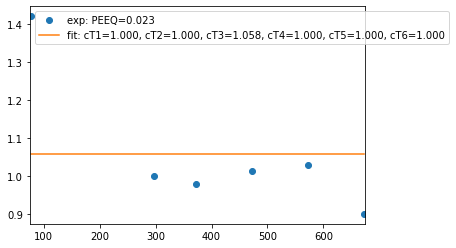

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


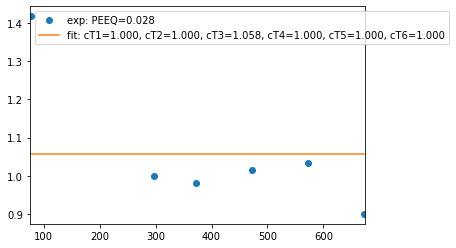

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


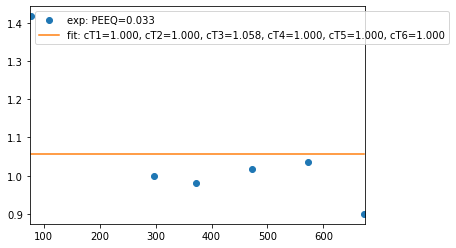

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


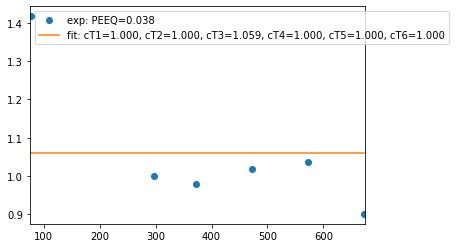

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


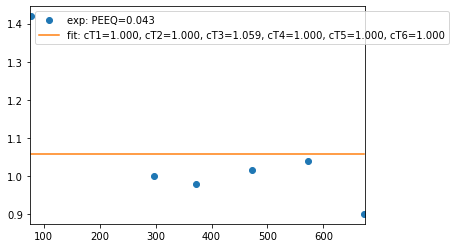

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


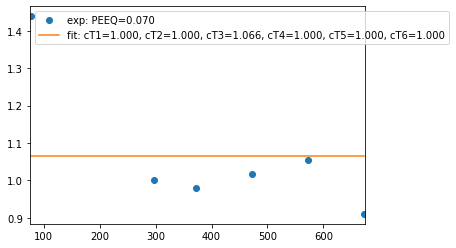

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


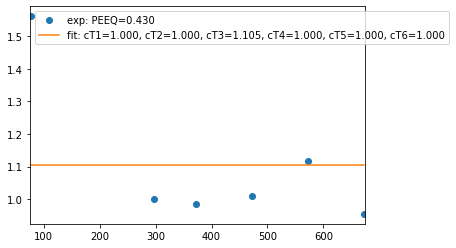

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


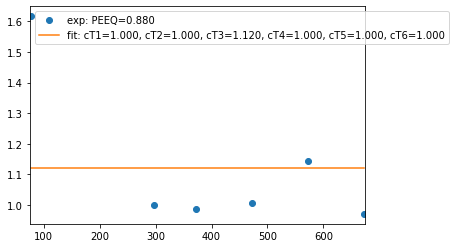

In [180]:
T = np.array([77.15, 298.15, 373.15, 473.15, 573.15, 673.15])
y = {}
p = {}

def f_func(T, cT1, cT2, cT3, cT4, cT5, cT6):
    return cT1*(np.exp(-cT2*T))+cT3+cT4*(np.exp(-((T-cT5)/cT6)**2))

#for i, row in enumerate((df.iloc[::2,[0]]).values.tolist()):
for j, i in enumerate(np.array([2, 4, 9, 14, 19, 24, 29, 34, 39, 66, 129, 174])):
    if i != 0:
        y["sref{}".format(i)] = np.array([df.iloc[i][-1], 1, df.iloc[i][-5], df.iloc[i][-4], df.iloc[i][-3], df.iloc[i][-2]])
        params = curve_fit(f_func, T, y["sref{}".format(i)], method='lm')
        #params = curve_fit(f_func, T, y["sref{}".format(i)], bounds=(0, [2., 0.001, 90, 1.9, 673.15, 800]))
        [cT1, cT2, cT3, cT4, cT5, cT6] = params[0]
        p["fit{}".format(i)] = [cT1, cT2, cT3, cT4, cT5, cT6]
        T_fit = np.linspace(np.min(T), np.max(T), 50)
        y_fit = f_func(T_fit, cT1, cT2, cT3, cT4, cT5, cT6)
        plotObjects = plt.plot(T,y["sref{}".format(i)],'o', T_fit, y_fit)
        plt.xlim([np.min(T_fit)-1, np.max(T_fit) + 1 ])   
        plt.legend(iter(plotObjects), ('exp: PEEQ=%5.3f'% df.iloc[i][0],  'fit: cT1=%5.3f, cT2=%5.3f, cT3=%5.3f, cT4=%5.3f, cT5=%5.3f, cT6=%5.3f' % tuple(p["fit{}".format(i)])))
        plt.show()
    else:
        str(0)